In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import cv2 as cv

***Histogram Computation on RGB***

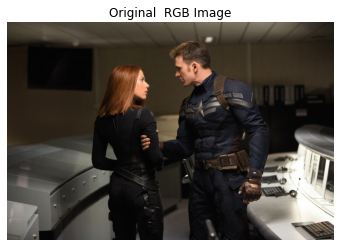

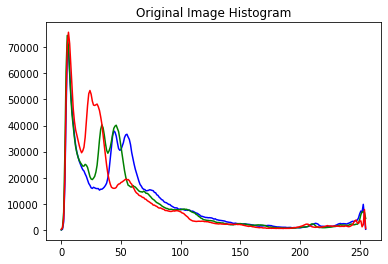

In [2]:
img = cv.imread('im08.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original  RGB Image')
plt.axis("off")
plt.show()
color = ('b', 'g', 'r')
for i,c in enumerate(color):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
    plt.title('Original Image Histogram')
plt.show()

***Histogram Computation on Grayscale***

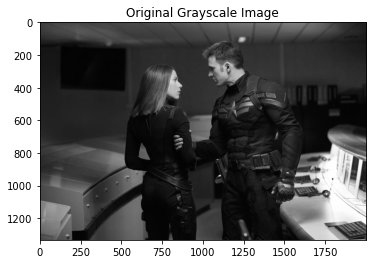

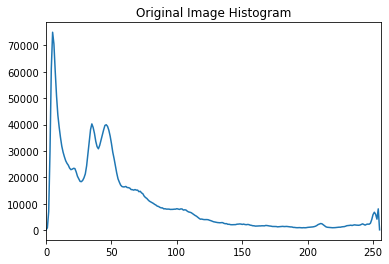

In [3]:
img = cv.imread('im08.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.show()
hist = cv.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.title('Original Image Histogram')
plt.show()

***Histogram Equalization on RGB***

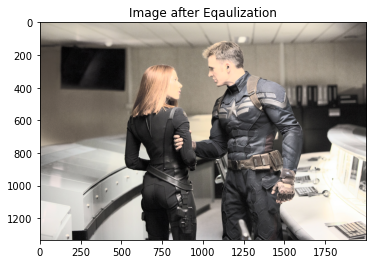

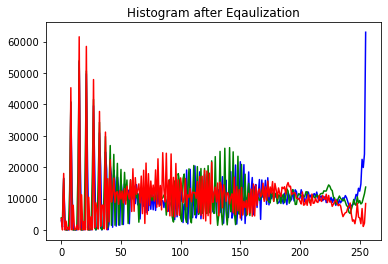

In [4]:
img = cv.imread('im08.png')
img_to_yuv = cv.cvtColor(img,cv.COLOR_BGR2YUV)
img_to_yuv[:,:,0] = cv.equalizeHist(img_to_yuv[:,:,0])
hist_equalization_result = cv.cvtColor(img_to_yuv, cv.COLOR_YUV2RGB)

plt.imshow(hist_equalization_result)
plt.title('Image after Eqaulization')
plt.show()

color = ('b', 'g', 'r')
for i,c in enumerate(color):
    hist = cv.calcHist([hist_equalization_result],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
    plt.title('Histogram after Eqaulization')
plt.show()

***Histogram Equalization on Gray Scale***

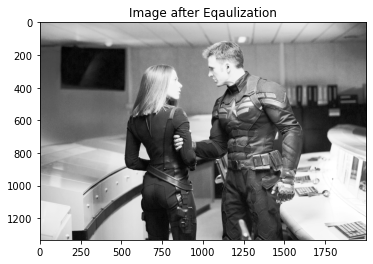

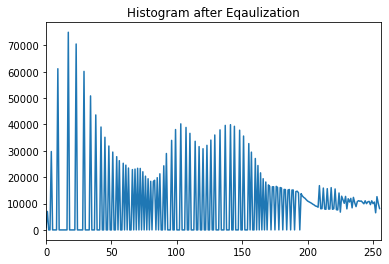

In [5]:
img = cv.imread('im08.png', cv.IMREAD_GRAYSCALE)
equ = cv.equalizeHist(img)
plt.imshow(equ, cmap='gray')
plt.title('Image after Eqaulization')
plt.show()
hist = cv.calcHist([equ], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.title('Histogram after Eqaulization')
plt.show()

***Intensity Transformation on Gray Scale***

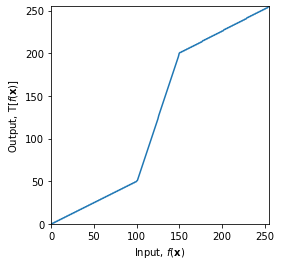

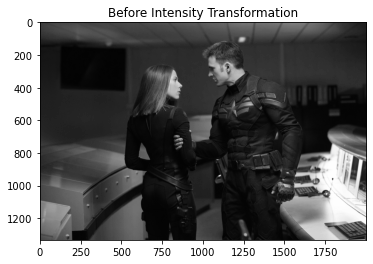

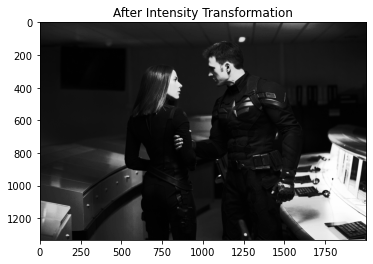

In [6]:
c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
#print(len(t1))
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
#print(len(t2))
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
#print(len(t3))

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
#print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
#plt.savefig('../../EN2550Lectures/en2550_lec02_point_operations_and_linear_filtering/figures/intensity_windowing.png')
plt.show()


img_orig = cv.imread('im08.png', cv.IMREAD_GRAYSCALE)
#cv.namedWindow("Image",  cv.WINDOW_AUTOSIZE)
#cv.imshow("Image", img_orig)
#cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
#cv.imshow("Image", image_transformed)
#cv.waitKey(0)
#cv.destroyAllWindows()


plt.imshow(img_orig, cmap='gray')
plt.title('Before Intensity Transformation')
plt.show()

plt.imshow(image_transformed, cmap='gray')
plt.title('After Intensity Transformation')
plt.show()

***Intensity Transformation on RGB***

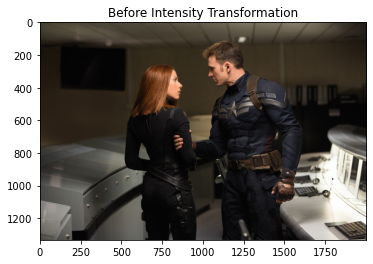

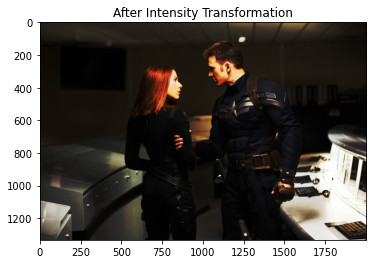

In [7]:
image = cv.imread('im08.png', cv.IMREAD_COLOR)
b = cv.LUT(image[:,:,0], transform)
g = cv.LUT(image[:,:,1], transform)
r = cv.LUT(image[:,:,2], transform)
    
reformed_image = np.dstack((b,g,r)) 

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Before Intensity Transformation')
plt.show()

plt.imshow(cv.cvtColor(reformed_image, cv.COLOR_BGR2RGB))
plt.title('After Intensity Transformation')
plt.show()

***Gamma Correction*** 

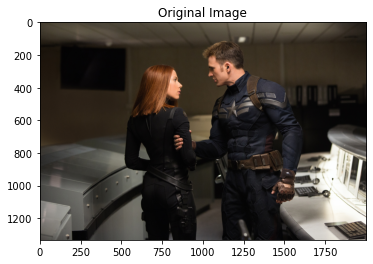

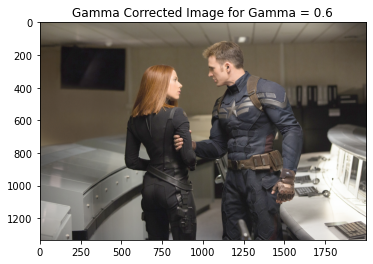

In [8]:
img_orig = cv.imread('im08.png',cv.IMREAD_COLOR)
img_orig=cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
gamma = 0.6
table = np.array([(i/255.0)**(gamma)*255.0 
for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(img_orig,table)

plt.imshow(img_orig)
plt.title('Original Image')
plt.show()

plt.imshow(img_gamma)
plt.title('Gamma Corrected Image for Gamma = 0.6')
plt.show()

#fig,ax=plt.subplots(1,2, figsize=(8,8))
#ax[0].imshow(img_orig)
#ax[0].set_title('Original')
#ax[0].axis('off')
#ax[1].imshow(img_gamma)
#ax[1].set_title('Gamma Corrected')
#ax[1].axis('off')
#plt.show()

***Gaussian Smoothning on RGB Images***

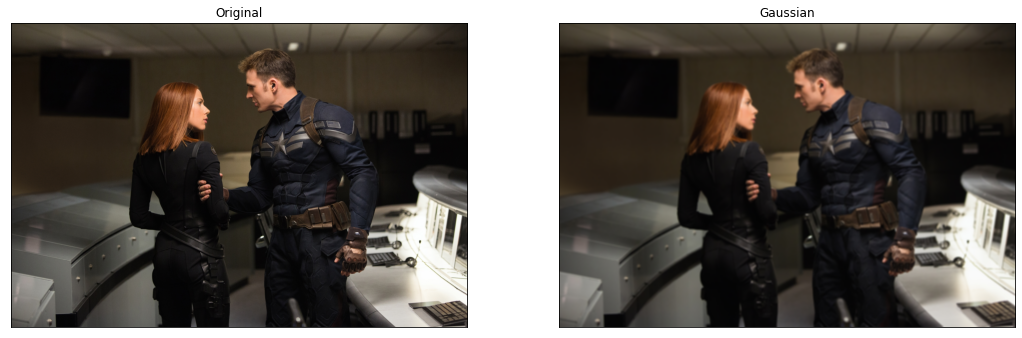

In [9]:
img = cv.imread('im08.png', cv.IMREAD_COLOR)

gaus = cv.getGaussianKernel(11, 5)
imgg = cv.sepFilter2D(img, -1, gaus, gaus)

#above two lines can be done usings cv.GaussianBlur(img,(11,11),5) function as well

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv.cvtColor(imgg, cv.COLOR_BGR2RGB))
axes[1].set_title('Gaussian')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

***Unsharp Masking***


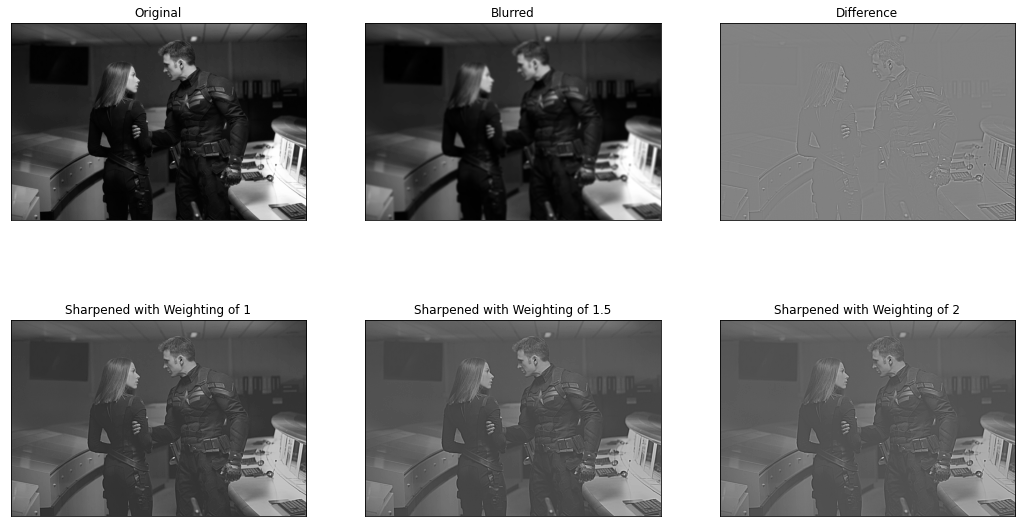

In [10]:
img = cv.imread('im08.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 4
kernel = cv.getGaussianKernel(9, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff = img.astype('float32') - blurred.astype('float32')


# Sharpened = Original Image + Weight * (Original Image - Blurred Image)
sharpened_1 = cv.addWeighted(img.astype('float32') , 1.0, diff, 1.0, 0)
sharpened_2 = cv.addWeighted(img.astype('float32') , 1.0, diff, 1.5, 0)
sharpened_3 = cv.addWeighted(img.astype('float32') , 1.0, diff, 2.0, 0)


fig, axes  = plt.subplots(2,3, sharex='all', sharey='all', figsize=(18,10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[0,2].imshow(diff + 125, cmap='gray')
axes[0,2].set_title('Difference')
axes[0,2].set_xticks([]), axes[1,0].set_yticks([])
axes[1,0].imshow(sharpened_1, cmap='gray')
axes[1,0].set_title('Sharpened with Weighting of 1')
axes[1,0].set_xticks([]), axes[1,1].set_yticks([])
axes[1,1].imshow(sharpened_2, cmap='gray')
axes[1,1].set_title('Sharpened with Weighting of 1.5')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
axes[1,2].imshow(sharpened_3, cmap='gray')
axes[1,2].set_title('Sharpened with Weighting of 2')
axes[1,2].set_xticks([]), axes[1,1].set_yticks([])
plt.show()


In [41]:
img = cv.imread('im08.png', cv.IMREAD_COLOR)

kernel = cv.getGaussianKernel(5, 2)
#blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
#diff = img.astype('float32') - blurred.astype('float32')

blurred_b = cv.sepFilter2D(img[:,:,0], -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
blurred_g = cv.sepFilter2D(img[:,:,0], -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
blurred_r = cv.sepFilter2D(img[:,:,0], -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)

dif_b = img[:,:,0] - blurred_b
dif_g = img[:,:,0] - blurred_g
dif_r = img[:,:,0] - blurred_r

reformed_image = np.dstack((dif_b, dif_g,dif_r)) 


sharpened = cv.addWeighted(img.astype('float32') , 1.0, reformed_image.astype('float32'), 1.0, 0)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img.astype('uint8'))
cv.waitKey(0)
cv.imshow("Image", sharpened.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

In [26]:
import os
from scipy import stats

def noisy(noise_typ,image):    
    """
    Parameters
    ----------
    image : ndarray
        Input image data. Will be converted to float.
    mode : str
        One of the following strings, selecting the type of noise to add:

        'gauss'     Gaussian-distributed additive noise.
        'poisson'   Poisson-distributed noise generated from the data.
        's&p'       Replaces random pixels with 0 or 1.
        'speckle'   Multiplicative noise using out = image + n*image,where
                    n is uniform noise with specified mean & variance.
        
        Source: https://stackoverflow.com/a/30609854
    """    
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 100.
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        print(stats.describe(noisy.ravel()))
        return noisy
    elif noise_typ == "s&p":
        # row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.2
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 255

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        noisy = np.clip(noisy, 0.0, 255.0)
        return noisy

***Median Filtering***

In [21]:
img = cv.imread('im08.png', cv.IMREAD_COLOR)
imn =  noisy('s&p', img.astype('float32'))
imf = cv.medianBlur(imn, 5)

#cv.imwrite('S&P.png', imn)
#cv.imwrite('median.png', imf)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", imn.astype('uint8'))
cv.waitKey(0)
cv.imshow("Image", imf.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()


<ipython-input-11-e6f9fc999fdc>:41: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 255
<ipython-input-11-e6f9fc999fdc>:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


***BiLateral Filtering***

In [23]:
img = cv.imread('im08.png', cv.IMREAD_COLOR)
imn =  noisy('s&p', img.astype('float32'))
imf = cv.bilateralFilter(img, 5, 50, 50, cv.BORDER_DEFAULT)

#cv.imwrite('bilateral.png', imf)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", imn.astype('uint8'))
cv.waitKey(0)
cv.imshow("Image", imf.astype('uint8'))
cv.waitKey(0)
cv.destroyAllWindows()

<ipython-input-11-e6f9fc999fdc>:41: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 255
<ipython-input-11-e6f9fc999fdc>:47: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


***Image Zooming***


In [87]:
def SSD(img1, img2):
    """
    Compute the sum of squared differences (SSD) between two images.
    """
    if img1.shape != img2.shape:
        print("Images don't have the same shape.")
    else:
        return np.sum((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32))**2)

In [88]:
def image_zoom(name, factor, method = 'BI', ssd = False):
    '''
    Name = Name of the Image (a string)
    Factor = The factor you wanted to get the image zoomed (a float/integer)
    Method = Interpolation Method (a string)
        NN - Nearest Neighbour
        BI - Bilinear Interpolation
    ssd = Whether you want to return the sum of squared error of the two images( for testing purposes)
    
    '''
    if factor >0 and factor <= 10 :
            
        img = cv.imread(name, cv.IMREAD_UNCHANGED)
        img
 
        print('Original Dimensions : ',img.shape)
 

        width = int(img.shape[1] * factor)
        height = int(img.shape[0] * factor)
        dim = (width, height)
  
        # resize image
        if method == "NN":
            resized = cv.resize(img, dim, interpolation = cv.INTER_NEAREST)
        elif method == "BI":
            resized = cv.resize(img, dim, interpolation = cv.INTER_LINEAR )
            
 
        print('Resized Dimensions : ',resized.shape)
        
        if ssd :
            name = name[:4]+'.png'
            img_original = cv.imread(name, cv.IMREAD_UNCHANGED)
            #print(img_original.shape)
            error = SSD(img_original, resized)
            print("Sum of Squarred Error: " + str(error))
            
        
 
        cv.imshow("Resized image", resized)
        cv.waitKey(0)
        cv.destroyAllWindows()
    else:
        print("Zooming factor is not in range [0,10]")

    

In [91]:
image_zoom('im07small.png',4, 'BI', True)

Original Dimensions :  (400, 640, 3)
Resized Dimensions :  (1600, 2560, 3)
Sum of Squarred Error: 2251492900.0
